In [23]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error


import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

## Кросс-валидация

Загрузим уже знакомый вам датасет о диабете.

In [2]:
data = datasets.load_diabetes()
X = data['data']
y = data['target']


Мы хотим посмотреть, насколько хорошо работают наши модели при различных разбиениях данных. На лекции вы ознакомилимь в принципами работы  `k-Fold` кросс-валидации, давайте посмотрим как это работает на практике.

Выберем кол-во сплитов, на которое мы хотим разделить наши данные.

In [3]:
kf = KFold(n_splits=5)

Посмотрим, что выдает функция разбиения.

In [4]:
kf.split(X, y)

<generator object _BaseKFold.split at 0x7f89b38c0660>

Мы получаем генератор, посмотрим подробнее на небольшой подвыборке для наглядности.

In [5]:
for train, test in kf.split(X[:10], y[:10]): 
    print('Train: ', train, 'Test: ', test)


Train:  [2 3 4 5 6 7 8 9] Test:  [0 1]
Train:  [0 1 4 5 6 7 8 9] Test:  [2 3]
Train:  [0 1 2 3 6 7 8 9] Test:  [4 5]
Train:  [0 1 2 3 4 5 8 9] Test:  [6 7]
Train:  [0 1 2 3 4 5 6 7] Test:  [8 9]


При каждой итерации мы получаем два списка с индексами: тренировочные индексы и тестовые. Благодарая им мы можем на каждой итерации отделять разные тестовые выборки, чтобы посчитать метрики качества на них. На каждой итерации необходимо заново обучать модель и делать предсказания.




In [8]:
mse = []
mape = []
for train, test in kf.split(X, y): 
    # инициализируйте и обучить модель линейной регрессии
    model = LinearRegression()
    model.fit(X[train], y[train])
    

    # сделайте предсказание
    pred = model.predict(X[test])

    # посчитайте метрики и сохраните их
    mse.append(mean_squared_error(y[test], pred))
    mape.append(mean_absolute_percentage_error(y[test], pred))

Посмотрим, как меняются метрики качества во время кросс-валидации.

In [9]:
mse

[2779.923449211685,
 3028.8363388285907,
 3237.687587704061,
 3008.746488841888,
 2910.21268776043]

In [10]:
mape

[0.42270160305883875,
 0.38157807356314544,
 0.43151233736427985,
 0.34956851625324803,
 0.388941048368767]

## Решающие деревья.

1. Повторите эксперимент с кросс-валидацией для решающих деревьев. Сравните полученные значения с метриками выше.

In [11]:
mse = []
mape = []
for train, test in kf.split(X, y): 
    # инициализируйте и обучить дерево
    model = DecisionTreeRegressor()
    model.fit(X[train], y[train])

    # сделайте предсказание
    pred = model.predict(X[test])

    # посчитайте метрики и сохраните их
    mse.append(mean_squared_error(y[test], pred))
    mape.append(mean_absolute_percentage_error(y[test], pred))

In [12]:
mse

[6714.5842696629215,
 6905.752808988764,
 6781.931818181818,
 4817.761363636364,
 7393.818181818182]

In [13]:
mape

[0.5954858838390772,
 0.5528360518749036,
 0.534875660529013,
 0.3863824715553005,
 0.5927912942941223]

Можем заметить, что в первом случае значения mape ниже, чем для решающих деревьев. Это значит, что для этой модели больше подходит линейная регрессия 





2. Постройте графики зависимости качества модели от глубины дерева. Качество модели измеряйте с помощью MSE, MAE и MAPE (должно получиться три отдельные картинки). Сделайте выводы.


    *Указание: в этой задаче кросс-валидацию использовать не нужно.*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

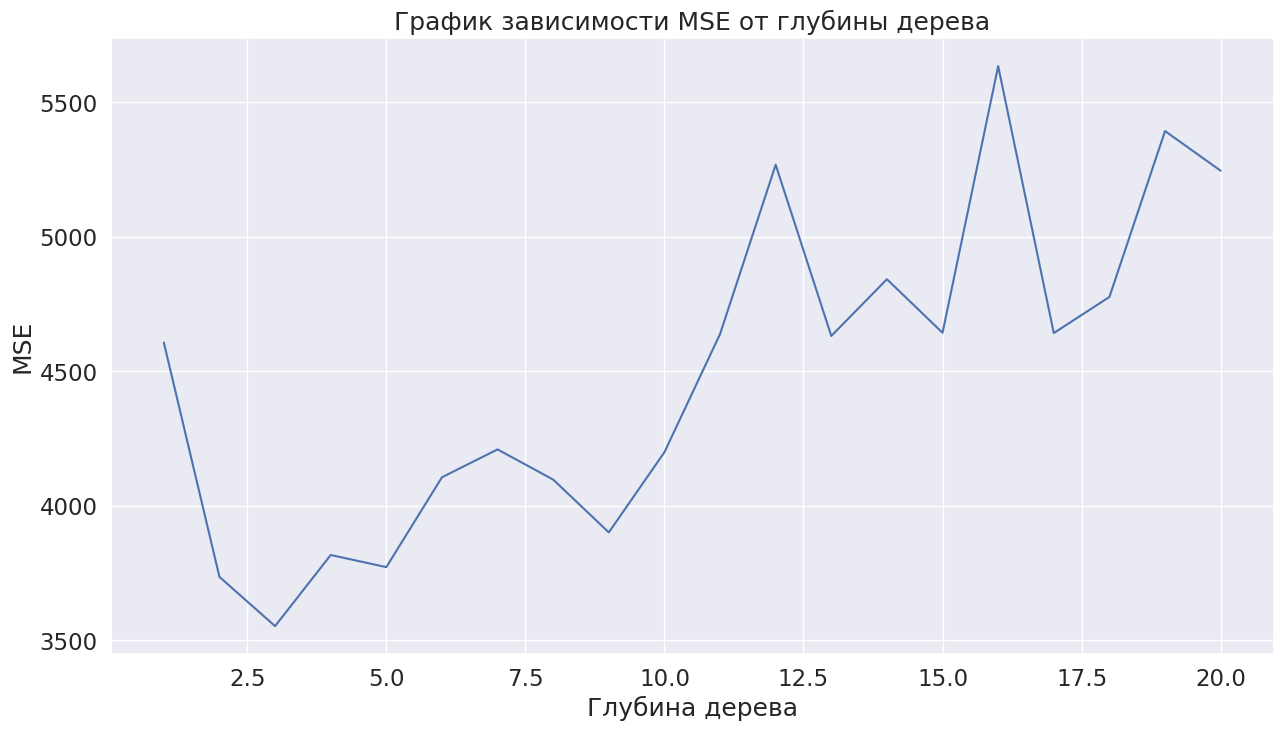

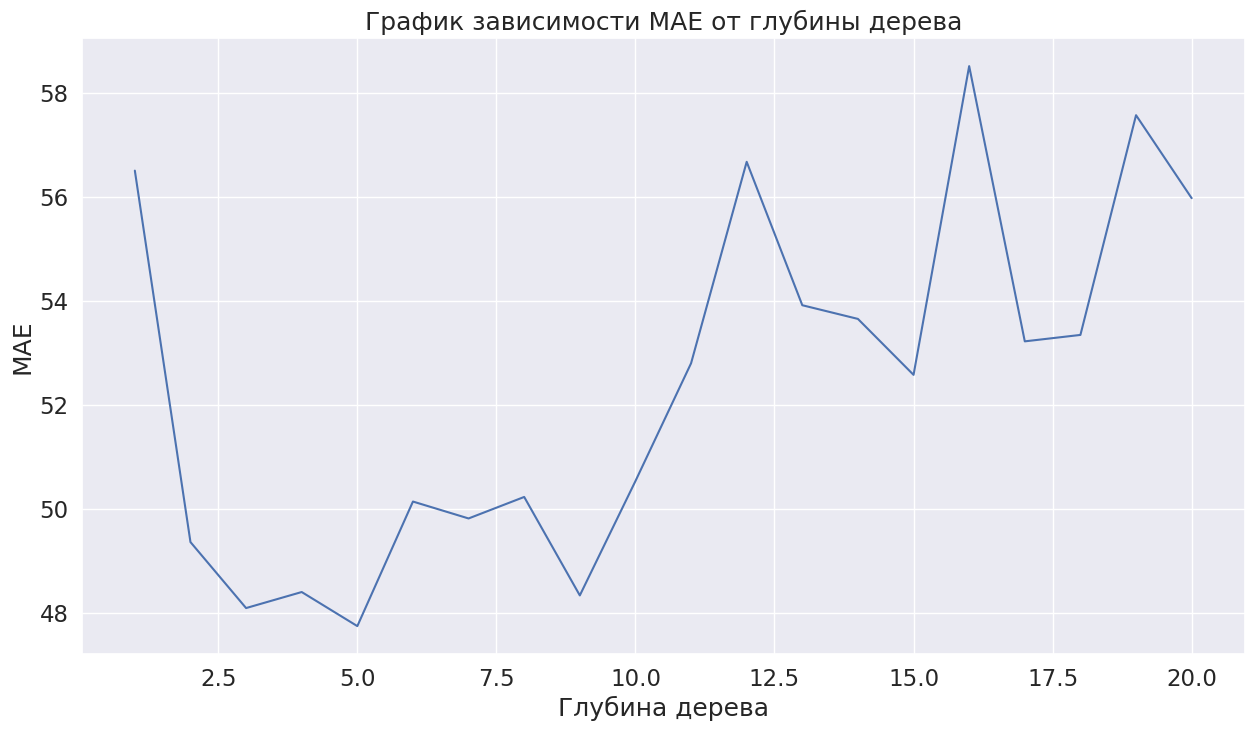

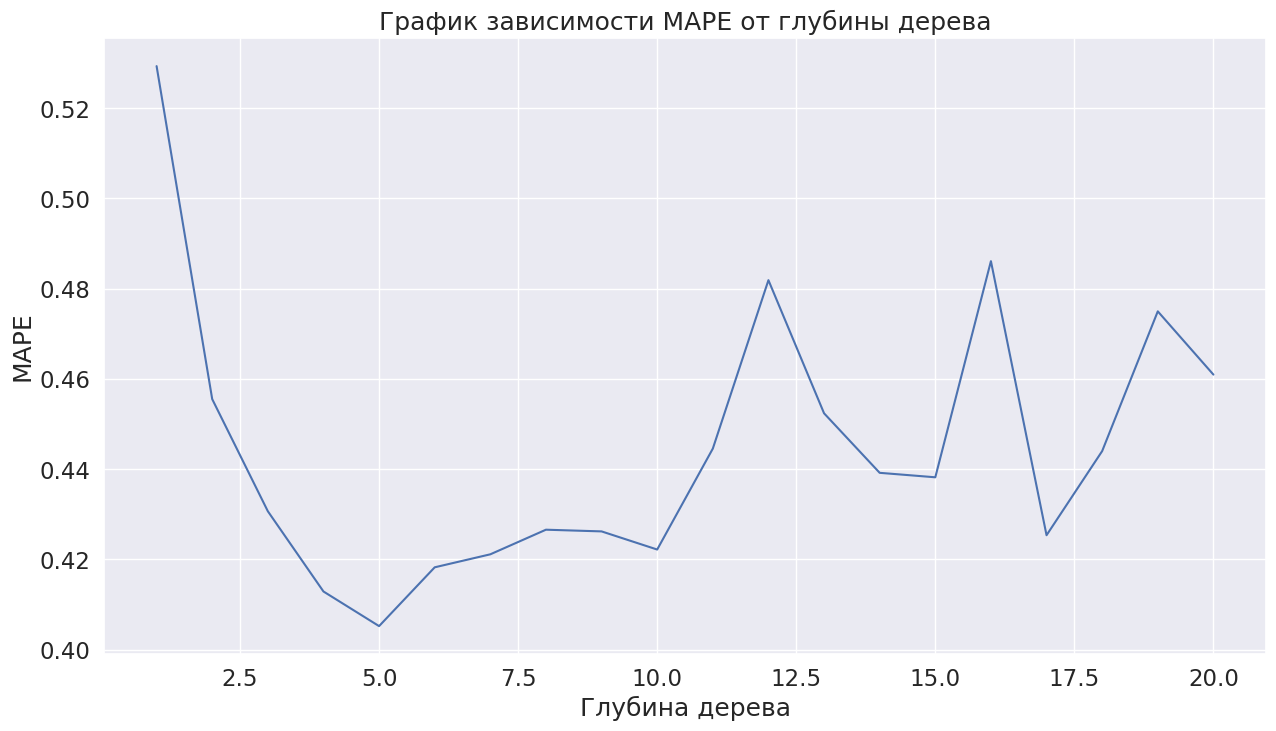

In [24]:
params = np.arange(1, 21)
mse = []
mae = []
mape = []

for param in params:
  model = DecisionTreeRegressor(max_depth=param)
  model.fit(X_train, y_train)

  pred = model.predict(X_test)

  mse.append(mean_squared_error(y_test, pred))
  mape.append(mean_absolute_percentage_error(y_test, pred))
  mae.append(mean_absolute_error(y_test, pred))

plt.figure(figsize=(15, 8))
plt.plot(params, mse)
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.title('График зависимости MSE от глубины дерева')

plt.figure(figsize=(15, 8))
plt.plot(params, mae)
plt.xlabel('Глубина дерева')
plt.ylabel('MAE')
plt.title('График зависимости MAE от глубины дерева')

plt.figure(figsize=(15, 8))
plt.plot(params, mape)
plt.xlabel('Глубина дерева')
plt.ylabel('MAPE')
plt.title('График зависимости MAPE от глубины дерева');

**Вывод:** По всем трем графикам можно сделать вывод, что идет тенденция по уменьшению MSE, MAE, MAPE до определенного момента, а дальше снова увеличивается. Это говорит о переобучении модели.

Оптимальное значение- это 5. На всех трех графиках это минимум